# Lecture 5 - Exercise notebook

## CQ1. (☆☆) Complete the following Byte-Pair Encoding tokenizer with the algorithm from the slides

In [25]:
import os
import requests

from collections import Counter

In [22]:
class BPEBasicTokenizer:
    """
    A simple Byte Pair Encoding tokenizer that learns a vocabulary from a given text
    and can encode/decode text into/from a list of tokens

    Based on: https://github.com/karpathy/minbpe/blob/master/minbpe/base.py, with LICENSE:

    The MIT License (MIT) Copyright (c) 2020 Andrej Karpathy

    Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    """
    def __init__(self):
        super().__init__()
        # Initialize class variables
        self.merges = None
        self.vocab = None

    def train(self, text, vocab_size, verbose=False):
        """
        Given a text and a desired vocabulary size, learn a vocabulary
        of vocab_size tokens using Byte Pair Encoding (BPE)
        """
        assert vocab_size >= 256  # 256 is the number of possible bytes, which are the initial vocabulary
        num_merges = vocab_size - 256  # number of merges to perform to reach the desired vocab size

        # Step 1. Preprocess text, converting it to bytes and then to a token list
        text_bytes = text.encode("utf-8") # raw bytes
        idxs = list(text_bytes) # list of integers in range 0..255

        # Step 2. Iteratively merge the most common pairs to create new tokens
        merges = {}  # (int, int) -> int
        vocab = {idx: bytes([idx]) for idx in range(256)}  # int -> bytes

        for i in range(num_merges):
            if len(idxs) < 2:
                print(f"WARNING: less than 2 tokens left, stopping early at merge {i}")
                break

            # Step 2.1. Count up the number of times every consecutive pair appears
            pair_counts = self._get_pair_counts(idxs)

            # Step 2.2. Find the pair with the highest count
            best_pair =  # TODO: find the pair with the highest count

            # Step 2.3. Create a new token: assign it the next available id
            new_idx = 256 + i

            # Step 2.4. Replace all occurrences of best_pair in idxs with new_idx
            idxs = self._merge_pair(idxs, best_pair, new_idx)

            # Step 2.5. Save the merge
            merges[best_pair] =  # TODO: save the new index for the pair
            vocab[new_idx] =  # TODO: save the new token, which is the concatenation of the two merged tokens

            # Print progress if verbose is True
            if verbose is True:
                print(f"merge {i+1}/{num_merges}: {best_pair} -> {new_idx} ({vocab[new_idx]}) had {pair_counts[best_pair]} occurrences")

        # Step 3. Save class variables
        self.merges = merges # used in encode()
        self.vocab = vocab   # used in decode()

    def encode(self, text: str) -> list[int]:
        """
        Given a Python string, return a list of token indices (integers)
        """
        # Step 1. Convert the Python string to a list of bytes
        text_bytes = text.encode("utf-8") # raw bytes

        # Step 2. Convert the list of bytes to a list of integers
        idxs = list(text_bytes) # list of integers in range 0..255

        # Step 3. Iteratively merge pairs until no more merges are possible
        while len(idxs) >= 2:
            # Step 3.1. Count up the number of times every consecutive pair appears in idxs
            pair_counts = self._get_pair_counts(idxs)

            # Step 3.2. Check that any of the pairs can be merged
            any_merge_possible = any(pair in self.merges for pair in pair_counts)
            if any_merge_possible is False:
                break

            # Step 3.3. Find the pair with the lowest merge index
            best_pair =  # TODO: find the pair with the lowest index (i.e., the one that was merged first)

            # Step 3.4. Merge the best pair
            merge_idx = self.merges[best_pair]
            idxs = self._merge_pair(idxs, best_pair, merge_idx)

        return idxs

    def decode(self, idxs: list[int]) -> str:
        """
        Given token indices (list of integers), return the decoded Python string
        """
        # Step 1. Convert the list of integers to a list of bytes using the vocab dictionary
        byte_list = [self.vocab[idx] for idx in idxs]
        # Step 2. Join the list of bytes into a single byte string
        text_bytes = b"".join(byte_list)
        # Step 3. Decode the byte string into a Python string
        return text_bytes.decode("utf-8", errors="replace")

    def _get_pair_counts(self, idxs: list[int]) -> dict[tuple[int, int], int]:
        """
        Given a list of integers (idxs), return a dict or Counter object with the
        counts of all consecutive pairs of integers
        Example: idxs=[1, 2, 3, 1, 2] -> dict({(1, 2): 2, (2, 3): 1, (3, 1): 1})
        """
        # TODO: implement this function

    def _merge_pair(self, idxs, pair, new_idx):
        """
        In the list of integers (ids), replace all consecutive occurrences
        of pair with the new integer token new_idx
        Example: ids=[1, 2, 3, 1, 2], pair=(1, 2), idx=4 -> [4, 3, 4]
        """
        new_idxs = []
        j = 0
        while j + 1 < len(idxs):
            if idxs[j] == pair[0] and idxs[j+1] == pair[1]:
                # TODO: replace the pair with the new_idx
            else:
                # TODO: keep the current integer

        if j < len(idxs): new_idxs.append(idxs[j])

        return new_idxs

I include some test cases now so you can check for any mistakes before looking at the solution. We begin by download the shakespeare data to train.

In [27]:
DATA_URL = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
DATA_DIR = "data"
DATA_PATH = f"{DATA_DIR}/shakespeare.txt"

def load_shakespeare():
    # Download Shakespeare's works
    os.makedirs(DATA_DIR, exist_ok=True)
    if not os.path.exists(DATA_PATH):
        response = requests.get(DATA_URL)
        with open(DATA_PATH, 'wb') as f:
            f.write(response.content)
    
    # Load the text
    with open(DATA_PATH, 'r') as f:
        text = f.read()

    return text

In [32]:
# Test case 1: Basic training and encoding
def test_gets_desired_vocab_size():
    text = load_shakespeare()[:10000]  # use only the first 10k characters
    tokenizer = BPEBasicTokenizer()
    tokenizer.train(text, vocab_size=300, verbose=False)
    assert len(tokenizer.vocab) == 300, f"Expected vocab size 300, got {len(tokenizer.vocab)}"

# Test case 2: Encoding and decoding
def test_encodes_and_decodes():
    train_text = load_shakespeare()[:10000]  # use only the first 10k characters
    tokenizer = BPEBasicTokenizer()
    tokenizer.train(train_text, vocab_size=300, verbose=False)

    test_samples = [
        "To be or not to be, that is the question.",
        "All the world's a stage, and all the",
        "Now is the winter of our discontent",
        "It was the best of times, it was the worst of times",
    ]

    for sample in test_samples:
        encoded = tokenizer.encode(sample)
        decoded = tokenizer.decode(encoded)
        assert sample == decoded, f"Expected {sample}, got {decoded}"

test_gets_desired_vocab_size()
test_encodes_and_decodes()
print("All tests passed!")


All tests passed!


## CQ2. (☆☆) Complete the following code for next-token prediction

In this exercise you are asked to complete parts of the lecture code, completing the training process for the Next-Token Prediction (NTP) task.

In [ ]:
import os
import requests
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl
import string

from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from transformer import Transformer, SinusoidalPositionalEncoding

The following cell doesn't require any change, it is copied from class. It just contains data downloading, basic tokenization and the basic dataset creation.
Note that we already covered tokenization in the first exercise, but you can also try coding this version from scratch to practice if you wish.

In [ ]:
DATA_URL = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
DATA_DIR = "data"
DATA_PATH = f"{DATA_DIR}/shakespeare.txt"

def load_shakespeare():
    # Download Shakespeare's works
    os.makedirs(DATA_DIR, exist_ok=True)
    if not os.path.exists(DATA_PATH):
        response = requests.get(DATA_URL)
        with open(DATA_PATH, 'wb') as f:
            f.write(response.content)
    
    # Load the text
    with open(DATA_PATH, 'r') as f:
        text = f.read()

    return text

class CharTokenizer:
    def __init__(self, text: str):
        self.vocab = sorted(list(set(text)))
        self.char_to_idx = {ch: idx for idx, ch in enumerate(self.vocab)}
        self.idx_to_char = {idx: ch for idx, ch in enumerate(self.vocab)}
        self.padding_idx = len(self.vocab)

    def encode(self, text: str):
        return [self.char_to_idx[ch] for ch in text]
    
    def decode(self, indices: list[int]):
        return ''.join([self.idx_to_char[idx] for idx in indices if idx != self.padding_idx])
    
    def batch_encode(self, texts: list[str], max_len=None):
        encoded_texts = [self.encode(text) for text in texts]

        max_len_texts = max(len(text) for text in encoded_texts)
        if max_len is None:
            max_len = max_len_texts
        else:
            max_len = min(max_len, max_len_texts)

        padded_texts = [
            text + [self.padding_idx] * (max_len - len(text))
            for text in encoded_texts
        ]
        attention_mask = [
            [True] * len(text) + [False] * (max_len - len(text))
            for text in encoded_texts
        ]

        return padded_texts, attention_mask
    
    def batch_decode(self, indices: list[list[int]]):
        return [self.decode(text) for text in indices]
    
    def get_vocab_size(self):
        return len(self.vocab) + 1  # +1 for padding
    
    def get_padding_idx(self):
        return self.padding_idx

class TextDataset(Dataset):
    def __init__(self, text, seq_len):
        self.text = text
        self.seq_len = seq_len

    def __len__(self):
        return len(self.text) // self.seq_len

    def __getitem__(self, idx):
        start_idx, end_idx = idx * self.seq_len, (idx + 1) * self.seq_len
        return self.text[start_idx:end_idx]

Next is the collate function. You need to complete this function to transform the output of the tokenizer (token indices and attention mask) to torch tensors to be used during training. Bear in mind:
1. `input_ids` and `input_attention_mask` will be fed to the model.
2. `target_ids` are the labels, the indices of the next token at each position.
3. `target_attention_mask` indicate which target_ids are padding and should not be predicted and taken into account when calculating the loss.

In [ ]:
class CollateFn:
    def __init__(self, tokenizer, max_seq_len):
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, batch):
        # batch: List[str]
        token_idxs, attention_mask = self.tokenizer.batch_encode(batch, self.max_seq_len)

        token_idxs = torch.tensor(token_idxs)  # (batch_size, seq_len)
        attention_mask = torch.tensor(attention_mask)  # (batch_size, seq_len)

        input_ids =  # TODO
        target_ids =  # TODO
        input_attention_mask =  # TODO
        target_attention_mask =  # TODO

        return input_ids, target_ids, input_attention_mask, target_attention_mask

The data module from Pytorch Lightning is also given to you, nothing new here to learn :)

In [ ]:
class ShakespeareDataModule(pl.LightningDataModule):
    def __init__(self, text, tokenizer, max_seq_len, batch_size):
        super().__init__()
        self.text = text
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len
        self.batch_size = batch_size

    def setup(self, stage=None):
        dataset = TextDataset(self.text, self.max_seq_len)

        train_size = int(0.9 * len(dataset))
        val_size = len(dataset) - train_size
        self.train_dataset, self.val_dataset = torch.utils.data.random_split(
            dataset, [train_size, val_size]
        )

        self.collate_fn = CollateFn(self.tokenizer, self.max_seq_len)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, collate_fn=self.collate_fn)
    
    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, collate_fn=self.collate_fn)

Now we get to the LightningModule. You will need to complete it:
1. Create a Transformer model with the given parameters, as well as the embeddings and final classification head.
2. Code the `forward` method.
3. Code the `_step` method, which calculates the loss function.

In [ ]:
class ShakespeareLightningModel(pl.LightningModule):
    def __init__(
        self,
        # Transformer params
        vocab_size: int,
        d_model: int,
        nhead: int,
        dim_feedforward: int,
        dropout: float,
        num_layers: int,
        # Embedding params
        padding_idx: int,
        # Positional encoding params
        max_len: int,
        # Training params
        optimizer_params: dict,
    ):
        super().__init__()
        self.save_hyperparameters()

        self.padding_idx = padding_idx

        # Transformer model
        self.model = Transformer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            num_layers=num_layers,
        )

        # Embedding layers
        self.embedding = nn.Embedding(vocab_size, d_model, padding_idx=padding_idx)
        # self.pos_embedding = nn.Embedding(max_len, d_model)

        # Classification head
        self.fc = nn.Linear(d_model, vocab_size)

        # Training params
        self.optimizer_params = optimizer_params

    def forward(self, input_idxs, attention_mask):
        input_embed =  # TODO  # (batch_size, seq_len, d_model)

        _, seq_len, d_model = input_embed.size()

        # NOTE Option 1: Learnable positional embeddings
        # positions = (
        #     torch.arange(seq_len, device=self.device)
        #     .unsqueeze(0)
        #     .to(self.device)
        # )  # (1, seq_len)
        # pos_embeddings = self.pos_embedding(positions)  # (1, seq_len, d_model)

        # NOTE Option 2: Sinusoidal positional embeddings
        pos_embeddings = (
            SinusoidalPositionalEncoding
            .get_positional_encoding(seq_len, d_model)
            .to(self.device)
            .unsqueeze(0)
        )  # (1, seq_len, d_model)

        output =  # TODO
        return self.fc(output)
    
    def training_step(self, batch, batch_idx):
        loss = self._step(batch)
        self.log("train_loss", loss, prog_bar=True, on_epoch=True, on_step=True)
        return loss
     
    def validation_step(self, batch, batch_idx):
        loss = self._step(batch)
        self.log("val_loss", loss, prog_bar=True, on_epoch=True, on_step=False)
        return loss
    
    def _step(self, batch):
        input_idxs, target_idxs, input_attention_mask, target_attention_mask = batch  # (batch_size, seq_len - 1)
        output =  # TODO: forward pass

        B, L, V = output.size()
        loss =  # TODO: calculate the loss WITHOUT REDUCTION

        # Mask out the padding tokens
        target_attention_mask = target_attention_mask.view(-1) / target_attention_mask.sum()  # (B * L)
        loss = (loss * target_attention_mask).sum()

        return loss
    
    def configure_optimizers(self):
        optimizer = optim.AdamW(self.model.parameters(), **self.optimizer_params)
        return optimizer
    
    def configure_callbacks(self):
        return super().configure_callbacks() + [
            pl.callbacks.ModelCheckpoint(monitor="val_loss"),
        ]


Let's now train the model (no changes needed). You may modify the hyperparameters to reduce resource requirements.

In [ ]:
text = load_shakespeare()
tokenizer = CharTokenizer(text)

vocab_size = tokenizer.get_vocab_size()
padding_idx = tokenizer.get_padding_idx()

d_model = 128
nhead = 8
dim_feedforward = 512
dropout = 0.1
num_layers = 8

max_seq_len = 100

batch_size = 64
optimizer_params = dict(lr=3e-4, weight_decay=1e-2)
max_epochs = 50

In [ ]:
data_module = ShakespeareDataModule(text, tokenizer, max_seq_len, batch_size)
data_module.setup()

model = ShakespeareLightningModel(
    vocab_size=vocab_size,
    d_model=d_model,
    nhead=nhead,
    dim_feedforward=dim_feedforward,
    dropout=dropout,
    num_layers=num_layers,
    padding_idx=padding_idx,
    max_len=max_seq_len,
    optimizer_params=optimizer_params,
)

In [ ]:
trainer = pl.Trainer(max_epochs=max_epochs)

Trainer will use only 1 of 3 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=3)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model, data_module)

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name      | Type        | Params
------------------------------------------
0 | model     | Transformer | 1.6 M 
1 | embedding | Embedding   | 8.4 K 
2 | fc        | Linear      | 8.5 K 
------------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params
6.413     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/pablo/.micromamba/envs/mdl_gen/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.


/home/pablo/.micromamba/envs/mdl_gen/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.


Epoch 49: 100%|██████████| 157/157 [00:04<00:00, 38.80it/s, v_num=25, train_loss_step=1.300, val_loss=1.400, train_loss_epoch=1.340]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 157/157 [00:04<00:00, 38.74it/s, v_num=25, train_loss_step=1.300, val_loss=1.400, train_loss_epoch=1.340]


## CQ3. (☆☆) Complete the Top-K and Top-P decoding strategies, and the `apply_temperature` method

In this exercise we will code the Top-K and Top-P decoding functions seen in class. We will also learn how to apply a temperature hyperparameter to the logits to modulate how creative or model is.

In [4]:
import torch
import torch.nn.functional as F

### Top-K decoding

Let's begin by programming the Top-K algorithm. If you get lost in any step, you can consult the explanation step-by-step of the method in the following cell! Just make sure to think about it a bit before giving up :)

In [5]:
def top_k_decoding(logits, k=20):
    # logits: (batch_size, vocab_size)
    top_k_logits, top_k_indices =  # TODO: use the torch.topk function  # (batch_size, k), (batch_size, k)

    # Sample from the top k indices
    probs =  # TODO: calc probs from logits  # (batch_size, k)
    sampled_indices = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

    return  # TODO: use the gather() function to select the sampled indices from top_k_indices

The function takes two inputs:
- `logits`: A tensor of shape `(batch_size, vocab_size)` representing unnormalized scores (logits) for each token in the vocabulary.
- `k`: The number of top tokens to consider for sampling (default is 20).

**Manual Example Input:**
- Batch size: \( 1 \) (one example).
- Vocabulary size: \( 10 \).
- Top \( k \): \( 3 \).
- Logits: `[1.0, 0.5, 2.0, -1.0, 0.0, 0.8, -0.5, 1.5, -1.5, 0.3]`.

---

#### **Step 2: Extract the Top \( k \) Tokens**
```python
top_k_logits, top_k_indices = torch.topk(logits, k, dim=-1)
```

This extracts the \( k \) highest logits and their corresponding indices from the vocabulary. 

**Manual Example:**
- From `logits = [1.0, 0.5, 2.0, -1.0, 0.0, 0.8, -0.5, 1.5, -1.5, 0.3]`:
  - The top 3 logits are `[2.0, 1.5, 1.0]`.
  - Their indices in the vocabulary are `[2, 7, 0]`.

**Output:**
- `top_k_logits = [2.0, 1.5, 1.0]` (logits of the top 3 tokens).
- `top_k_indices = [2, 7, 0]` (indices of the top 3 tokens).

---

#### **Step 3: Compute Probabilities for the Top \( k \)**
```python
probs = F.softmax(top_k_logits, dim=-1)
```

The logits in `top_k_logits` are converted into probabilities using the softmax function.

**Manual Example:**
Softmax computation for `top_k_logits = [2.0, 1.5, 1.0]`:
1. Compute $e^{\text{logit}}$ for each value:
   $$
   e^{2.0} = 7.389, \, e^{1.5} = 4.482, \, e^{1.0} = 2.718
   $$
2. Sum them:
   $$
   \text{sum} = 7.389 + 4.482 + 2.718 = 14.589
   $$
3. Compute probabilities:
   $$
   \text{probs} = \left[\frac{7.389}{14.589}, \frac{4.482}{14.589}, \frac{2.718}{14.589}\right]
               ≈ [0.506, 0.307, 0.186]
   $$

**Output:**
- `probs = [0.506, 0.307, 0.186]` (probabilities for the top 3 tokens).

---

#### **Step 4: Sample a Token from the Top \( k \)**
```python
sampled_indices = torch.multinomial(probs, num_samples=1)
```

The function samples one index from the `probs` distribution using multinomial sampling. 

**Manual Example:**
- Sampling from `probs = [0.506, 0.307, 0.186]` could randomly select one index. Suppose the sampling picks the second index (based on the probabilities).

**Output:**
- `sampled_indices = [1]` (the sampled index within the top \( k \)).

---

#### **Step 5: Map Back to Original Vocabulary Indices**
```python
return top_k_indices.gather(dim=-1, index=sampled_indices)
```

The sampled index is mapped back to the original vocabulary using `top_k_indices`.

**Manual Example:**
- `top_k_indices = [2, 7, 0]`.
- `sampled_indices = [1]` corresponds to the second element in `top_k_indices`, which is `7`.

**Output:**
- The function returns `7` as the index of the selected token in the original vocabulary.

---

#### **Final Output**
For the example input, the function outputs the token index `7` as the sampled token.

### Top-P decoding

Let's now get to programming the Top-P algorithm, which is a bit longer and less intuitive. Again, if you get lost in any step, you can consult the explanation step-by-step of the method in the following cell! Just make sure to think about it a bit before giving up :)

In [17]:
def top_p_decoding(logits, p=0.9):
    # logits: (batch_size, vocab_size)
    
    # Step 1: Sort logits and get the probabilities
    sorted_logits, sorted_indices =  # TODO: use the torch.sort function  # (batch_size, vocab_size)
    sorted_probs = F.softmax(sorted_logits, dim=-1)  # (batch_size, vocab_size)
    
    # Step 2: Compute cumulative probabilities
    cumulative_probs = torch.cumsum(sorted_probs, dim=-1)  # (batch_size, vocab_size)
    # TODO: understand what the previous function is doing!
    
    # Step 3: Mask to keep only top tokens with cumulative probability <= p
    # We use a mask to zero out logits for tokens that don't meet the cumulative probability threshold
    mask = cumulative_probs <= p  # (batch_size, vocab_size)
    
    # Ensure that we leave at least one token in the distribution
    mask[..., 0] = 1  # Always keep at least the top token
    
    # Step 4: Set logits for masked tokens to a very low value (negative infinity)
    masked_logits = # TODO: use the masked_fill() function to set all masked values to -inf  # (batch_size, vocab_size)
    # TODO: why do you think we set the masked logits to -inf?
    
    # Step 5: Sample from the resulting distribution
    probs = F.softmax(masked_logits, dim=-1)  # (batch_size, vocab_size)
    sampled_indices = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)
    
    # Step 6: Gather the sampled indices from the sorted list to get the actual token index
    output_indices =  # TODO: use the gather() function to get the correct token indices from the sample  # (batch_size, 1)
    
    return output_indices

#### Example:

Let's assume we have the following logits for a batch of size 1 and a vocabulary size of 5. These logits represent the unnormalized prediction scores for each token:

```python
logits = torch.tensor([[1.0, 2.0, 0.5, -1.0, 0.2]])  # (batch_size=1, vocab_size=5)
```

We'll also set `p = 0.8` for this example, meaning we want to sample from the smallest set of tokens that together have a cumulative probability of at least 80%.

Now, let's break down the **Top-P decoding** process for this example:

---

#### Step 1: **Sort the logits and get probabilities**

We first sort the logits in descending order and then convert them to probabilities using the **softmax** function.

##### Sorting the logits:

```python
sorted_logits, sorted_indices = torch.sort(logits, dim=-1, descending=True)
```

This results in:

```python
sorted_logits = torch.tensor([[ 2.0,  1.0,  0.5,  0.2, -1.0]])
sorted_indices = torch.tensor([[1, 0, 2, 4, 3]])
```

- The logits are now sorted in descending order: `[2.0, 1.0, 0.5, 0.2, -1.0]`.
- `sorted_indices` is a tensor that contains the indices of the sorted tokens in the original order: `[1, 0, 2, 4, 3]`.

Next, apply the **softmax** to convert logits into probabilities:

```python
sorted_probs = F.softmax(sorted_logits, dim=-1)
```

This gives us the probabilities:

```python
sorted_probs = torch.tensor([[0.4625, 0.2555, 0.1320, 0.1072, 0.0428]])
```

- **Softmax** ensures that the values sum to 1. In this case, we get: `[0.4625, 0.2555, 0.1320, 0.1072, 0.0428]`.

---

#### Step 2: **Compute cumulative probabilities**

Now, we calculate the **cumulative sum** of the sorted probabilities. This helps us track how much probability mass we are accumulating as we consider the top tokens.

```python
cumulative_probs = torch.cumsum(sorted_probs, dim=-1)
```

The cumulative probabilities are:

```python
cumulative_probs = torch.tensor([[0.4625, 0.7180, 0.8500, 0.9572, 1.0000]])
```

- The cumulative probabilities represent how much of the total probability mass is covered by the top `n` tokens.
  - After the top 1 token, the cumulative probability is `0.4625`.
  - After the top 2 tokens, the cumulative probability is `0.7180`.
  - After the top 3 tokens, the cumulative probability is `0.8500`, and so on.

---

#### Step 3: **Create a mask to keep tokens where cumulative probability $\leq p$**

Now, we create a **mask** that selects tokens where the cumulative probability is less than or equal to `p`. This ensures that we only sample from the smallest subset of tokens that add up to at least `p` probability.

For `p = 0.8`, we create the mask:

```python
mask = cumulative_probs <= p
```

This gives us:

```python
mask = torch.tensor([[True, True, True, False, False]])
```

- The top 3 tokens (with cumulative probability `0.8500`) are included because their cumulative probability is less than or equal to `0.8`.
- The mask ensures that only the top 3 tokens are considered for sampling.

---

#### Step 4: **Set logits of masked-out tokens to a very low value**

Now that we know which tokens should be considered (from the mask), we **mask out** the logits of the tokens that we don't want to consider. We do this by setting their logits to a very low value (negative infinity), so their corresponding probabilities become zero.

```python
masked_logits = sorted_logits.masked_fill(mask == 0, float('-inf'))
```

This results in:

```python
masked_logits = torch.tensor([[ 2.0,  1.0,  0.5, -inf, -inf]])
```

- The logits for tokens that are masked out (`-inf`) are effectively removed from the probability distribution.

---

#### Step 5: **Reapply softmax to get a valid distribution and sample**

After masking out the irrelevant tokens, we apply the **softmax** function again to get a valid probability distribution over the remaining tokens.

```python
probs = F.softmax(masked_logits, dim=-1)
```

This gives us the new probabilities:

```python
probs = torch.tensor([[0.4625, 0.2555, 0.1320, 0.0000, 0.0000]])
```

- Now the probabilities only sum over the top 3 tokens (`[0.4625, 0.2555, 0.1320]`), and the others are zero.

We can now **sample** from this distribution:

```python
sampled_indices = torch.multinomial(probs, num_samples=1)
```

Suppose the sampled index is `0`, meaning we select the token corresponding to the first index in the sorted list, which is `1` in the original vocabulary (corresponding to the `2.0` logit).

---

#### Step 6: **Map back to the original token indices**

Remember that `sorted_indices = [1, 0, 2, 4, 3]`, which meant that the most likely token was $t_1$, the second most likely token was $t_0$, the third was $t_2$, and so on. When we sampled in the previous step, we were sampling with the sorted probabilities:
- Sampling a $0$ means that we must take the most likely token, which in our example is $t_1$.
- Sampling a $4$ would mean taking the fifth most likely token, which in our example is $t_3$.

Thus, we need to **map** the sampled index back to the original token index. We use the `sorted_indices` tensor to get the correct token.

```python
output_indices = torch.gather(sorted_indices, dim=-1, index=sampled_indices)
```

This gives us:

```python
output_indices = torch.tensor([[1]])
```

This means we sampled the token corresponding to index `1` in the original vocabulary, which is the token with the logit `2.0`.

In [25]:
def test_top_p_decoding():
    torch.manual_seed(42)  # Set seed for reproducibility

    batch_size, vocab_size = 10, 20
    logits = torch.randn(batch_size, vocab_size)

    sample = top_p_decoding(logits)
    expected_sample = torch.tensor([
        [ 2], [ 1], [ 5], [11], [14],
        [ 4], [ 8], [ 7], [10], [ 8]
    ])

    assert torch.all(sample == expected_sample), f"Expected {expected_sample}, got {sample}"

test_top_p_decoding()
print("All tests passed!")

All tests passed!


### Temperature

In [26]:
def apply_temperature(logits, temperature=0.7):
    # Apply temperature scaling
    return  # TODO: apply temperature scaling to the logits

In [28]:
# Create a test
def test_apply_temperature():
    torch.manual_seed(42)  # Set seed for reproducibility

    logits = torch.tensor([[1.0, 2.0, 3.0]])
    temperature = 0.5

    output = apply_temperature(logits, temperature)
    expected_output = torch.tensor([[2.0, 4.0, 6.0]])

    assert torch.all(output == expected_output), f"Expected {expected_output}, got {output}"

test_apply_temperature()
print("All tests passed!")

All tests passed!


Let's look at how the temperature parameter affects the probability distribution!

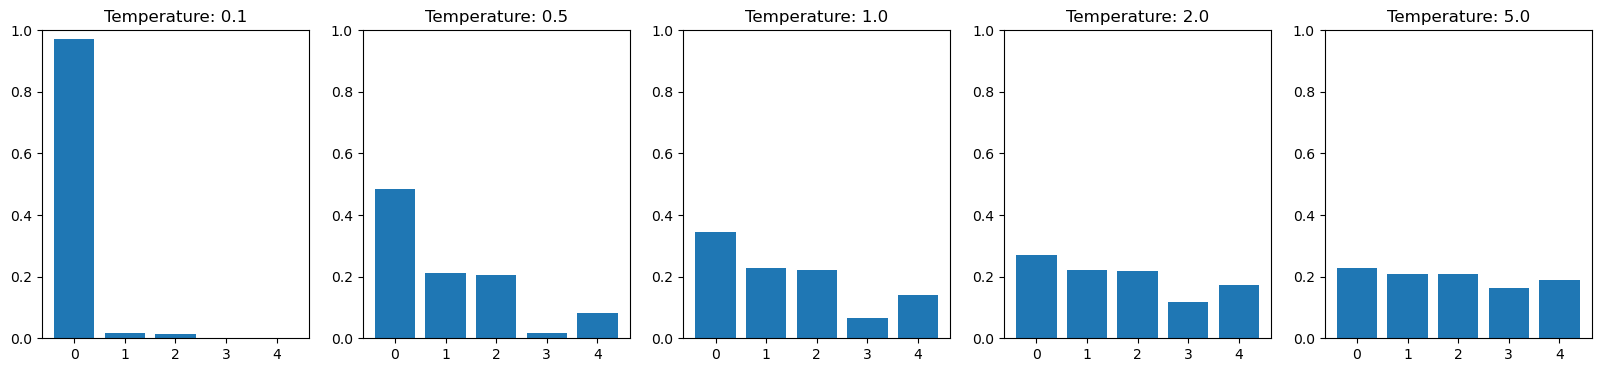

In [33]:
import matplotlib.pyplot as plt

logits = torch.randn(1, 5)
probs = F.softmax(logits, dim=-1).numpy()

temperatures = [0.1, 0.5, 1.0, 2.0, 5.0]
scaled_probs = [F.softmax(apply_temperature(logits, temp), dim=-1).numpy() for temp in temperatures]

# Bar plot for each temperature separately
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, temp in enumerate(temperatures):
    ax[i].bar(range(5), scaled_probs[i][0])
    ax[i].set_title(f"Temperature: {temp}")
    ax[i].set_xticks(range(5))
    ax[i].set_ylim([0, 1])
plt.show()
